<a href="https://colab.research.google.com/github/AdrianAlbrecht/Collab/blob/main/SSI_Siec_Hopfielda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [26]:
wzorzec_1 = [
    [1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
]
wzorzec_2 = [
    [1, 0, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1]
]
wzorzec_3 = [
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
]
wzorce = [wzorzec_1, wzorzec_2, wzorzec_3]
wzorce = [np.where(np.array(x) == 0, -1, x).flatten() for x in wzorce]
obraz_testowy_1 = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0]
]
obraz_testowy_2 = [
    [1, 1, 0, 0, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [1, 1, 0, 0, 1]
]
obraz_testowy_3 = [
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0]
]
obraz_testowy_4 = [
    [0, 1, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1]
]
testy = [obraz_testowy_1, obraz_testowy_2, obraz_testowy_3, obraz_testowy_4]
testy = [np.where(np.array(x) == 0, -1, x).flatten() for x in testy]

In [27]:
class HopfieldSiecAlgorytm:
    def __init__(self, rozmiar):
        self.rozmiar = rozmiar
        self.siec = np.zeros((rozmiar, rozmiar))

    def zamien_0_na_minus1(self, obraz):
        obraz_zamieniony = np.where(np.array(obraz) == 0, -1, obraz)
        return obraz_zamieniony

    def nauczObrazy(self, obrazy):
        for obraz in obrazy:
            obraz_zamieniony = self.zamien_0_na_minus1(obraz)
            self.siec += np.outer(obraz_zamieniony, obraz_zamieniony)
            np.fill_diagonal(self.siec,0)

    def rozpoznajObraz(self, obraz, max_iter=10):
        obraz_naprawiony = obraz.copy()
        for _ in range(max_iter):
            for i in range(self.rozmiar):
                suma = np.sum(self.siec[i, :] * obraz_naprawiony)
                obraz_naprawiony[i] = 1 if suma >= 0 else -1

        return obraz_naprawiony

In [28]:
siec = HopfieldSiecAlgorytm(25)
siec.nauczObrazy(wzorce)

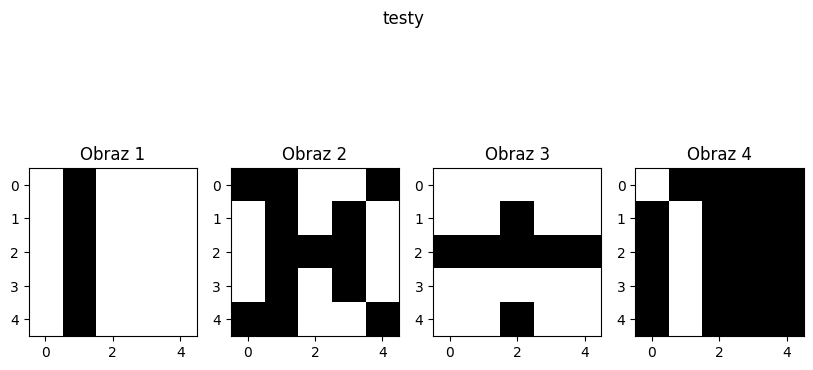

In [29]:
plt.figure(figsize=(10, 5))
for i in range(len(testy)):
  plt.subplot(141+i)
  plt.imshow(testy[i].reshape((5, 5)), cmap='binary', vmin=-1, vmax=1)
  plt.title(f"Obraz {i+1}")
plt.suptitle("testy")
plt.show()

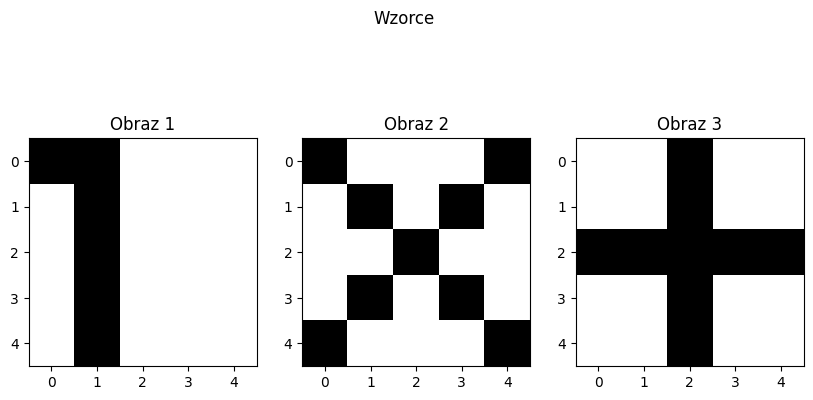

In [30]:
plt.figure(figsize=(10, 5))
for i in range(len(wzorce)):
  plt.subplot(131+i)
  plt.imshow(wzorce[i].reshape((5, 5)), cmap='binary', vmin=-1, vmax=1)
  plt.title(f"Obraz {i+1}")
plt.suptitle("Wzorce")
plt.show()

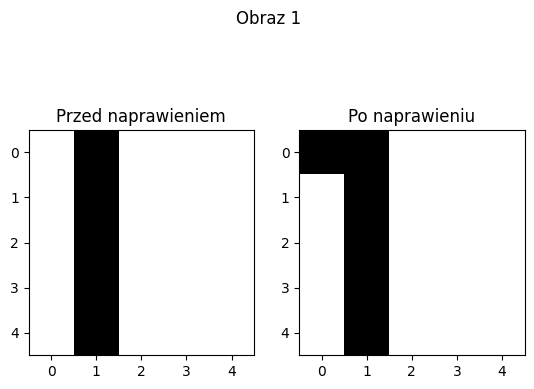

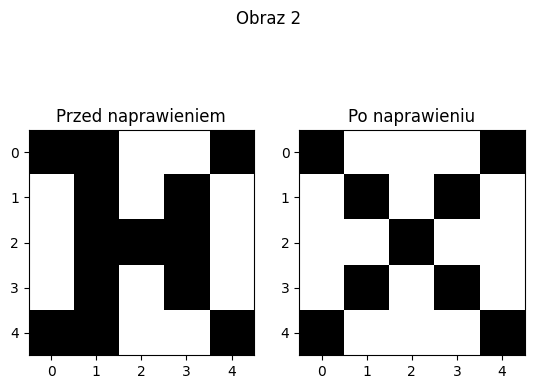

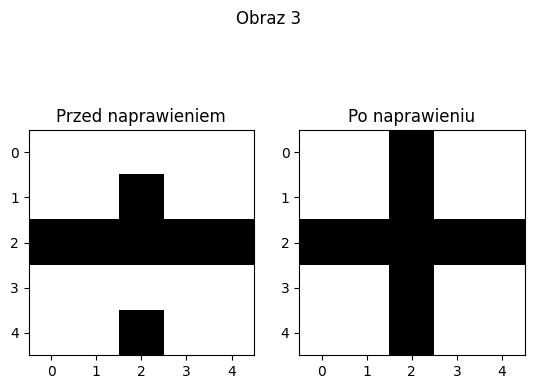

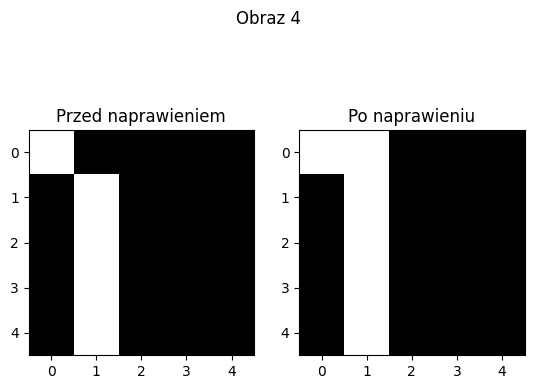

In [31]:
for i in range(len(testy)):
  plt.subplot(121)
  plt.imshow(testy[i].reshape((5, 5)), cmap='binary', vmin=-1, vmax=1)
  plt.title(f"Przed naprawieniem")
  plt.subplot(122)
  plt.imshow(siec.rozpoznajObraz(testy[i]).reshape((5, 5)), cmap='binary', vmin=-1, vmax=1)
  plt.title(f"Po naprawieniu")
  plt.suptitle(f"Obraz {i+1}")
  plt.show()